In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from scipy import ndimage, misc
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from vis.visualization import visualize_activation
from vis.utils.utils import stitch_images

Using Theano backend.


In [2]:
train = pd.read_csv('train.csv', index_col='id')
test = pd.read_csv('test.csv', index_col='id')
submit = pd.read_csv('sample_submission.csv', index_col='id')

In [3]:
onehot = CountVectorizer()
onehot.fit(submit.columns)
y = onehot.transform(train.species).todense()

In [4]:
images = []
for id in train.index:
    img = ndimage.imread('images/{}.jpg'.format(id))
    images.append(img)

## TODO
1. Confusion matrix
2. Graphs of training error
3. Saving models - some sort of widget that lets you compare architectures? Sort top performers?
4. Visualization.

In [5]:
def process_image(img):
    x, y = img.shape[0], img.shape[1]
    if x > y:
        img = np.pad(img, [(0, 0), ((x-y)/2, (x-y)/2)], mode='constant')
    else:
        img = np.pad(img, [((y-x)/2, (y-x)/2), (0, 0)], mode='constant')
    
    img = misc.imresize(img, (50, 50))
    return img

def process_images(images):
    return np.asarray(map(process_image, images))

In [7]:
X = process_images(images)[:, :, :, np.newaxis].astype('float32')/255

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=train.species)

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(50, 50, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(99, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 50, 50, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
__________

In [10]:
datagen = ImageDataGenerator(
    rotation_range=5, 
    horizontal_flip=True, 
    height_shift_range=0.05, 
    width_shift_range=0.05, 
    zoom_range=0.05)
datagen.fit(X_train)


In [ ]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    steps_per_epoch=2000/32,
                    epochs=10, validation_data=(X_test, y_test))

In [ ]:
model = Sequential()
model.add(Conv2D(16, (5, 5), input_shape=(50, 50, 1), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Conv2D(32, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
model.add(Dense(99, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test))

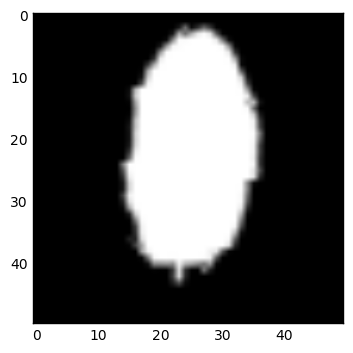

In [12]:
datagen = ImageDataGenerator(
    rotation_range=5, 
    horizontal_flip=True, 
    height_shift_range=0.05, 
    width_shift_range=0.05, 
    zoom_range=0.1)
datagen.fit(X)
img = next(datagen.flow(X,y))
plt.imshow(np.reshape(img[0][0], (50, 50)), cmap='gray')

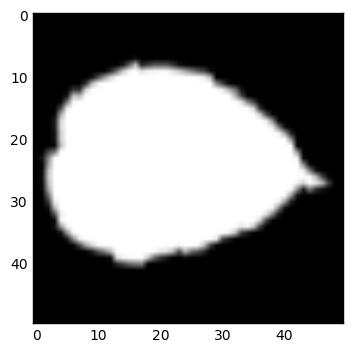

In [11]:
img = next(datagen.flow(X,y))
plt.imshow(np.reshape(img[0][0], (50, 50)), cmap='gray')

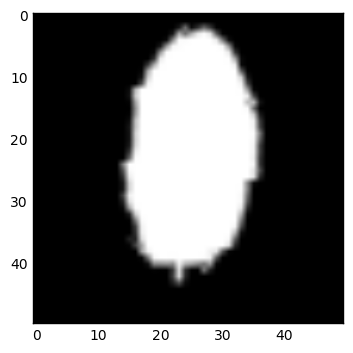

In [13]:
plt.imshow(np.reshape(img[0][0], (50, 50)), cmap='gray')

In [ ]:
img[0][0].shape